# Proyek Analisis Data: Bike Sharing (day)
- **Nama:** Nabilla Oktabania Pratiwi
- **Email:** M002B4KX3191@bangkit.academy
- **ID Dicoding:** M002B4KX3191

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah jumlah penggunaan sepeda lebih tinggi pada hari libur dibandingkan dengan hari kerja?
- Pertanyaan 2 : Apakah cuaca memengaruhi permintaan penggunaan sepeda?
- Pertanyaan 3 : Bagaimana tren penggunaan sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [ ]:
data = 'https://raw.githubusercontent.com/Nabillaop/M002B4KX3191_Nabilla-Oktabania-Pratiwi/refs/heads/main/day.csv' # Mengimport data dari github
data_hari = pd.read_csv(data) # Mendefinisikan data permintaan penggunaan sepeda per hari
data_hari # Menampilkan data permintaan penggunaan sepeda perhari


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Terdapat dataset day.csv yang berisi data peminjaman sepeda selama 731 hari (dari tanggal 01-01-2011 hingga 31-12-2012).
- Pada data tersebut terdapat kolom yang memuat informasi diantaranya adalah:
  - instant (nomor urut setiap hari),
  - dteday (tanggal spesifik untuk data harian),
  - season (1 spring, 2 summer, 3 fall, 4 winter),
  - year (0 untuk 2011, dan 1 untuk 2012),
  - mnth (angka 1-12 merepresentasikan bulan januari-desember),
  - holiday (indikator hari libur, dengan 0 bukan hari libur dan 1 hari libur),
  - weekday (0-6 yang berarti hari senin hingga minggu),
  - workingday (indikator apakah hari kerja atau bukan, 0 bukan hari kerja, 1 hari kerja),
  - weathersit (kategori kondisi cuaca, 1 cuaca cerah, 2 mendung, 3 hujan),
  - temp (suhu normalisasi, 0-1 dengan 0 terendah),
  - atemp (suhu terasa),
  - hum (kelembaban),
  - windspeed (kecepatan angin),
  - casual (jumlah pengguna yang menggunakan sepeda sesekali),
  - registered (jumlah pengguna terdaftar),
  - cnt (jumlah pengguna total).

### Assessing Data

In [ ]:
#menampilkan informasi mengenai tipe data untuk data hari
print(data_hari.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
#memeriksa missing values untuk data hari
print(data_hari.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#memeriksa duplikasi data untuk data hari
print("Jumlah duplikasi: ", data_hari.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# statistik deskriptif dari data untuk data hari
print(data_hari.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Insight:**
- Berdasarkan output di atas, tidak terdapat missing value ataupun data duplikat pada dataset.

### Cleaning Data

In [ ]:
# Data tidak memiliki missing value ataupun data duplikat, ini hanya contoh saja jika data belum clean
data_hari.drop_duplicates(inplace=True) #mengatasi data duplikat
data_hari[data_hari.isna()] #mengatasi missing value

# Memilih hanya kolom numerik untuk pengolahan data berikutnya
data_numerik = data_hari.select_dtypes(include=['float64', 'int64'])
data_numerik


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Data sudah bersih, tidak perlu melakukan cleaning data untuk menghilangkan data duplikat ataupun mengatasi missing value.
- Note: kode tetap dituliskan walaupun tidak digunakan pada kasus data penggunaan sepeda harian.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# statistik deskriptif dari data
data_hari.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


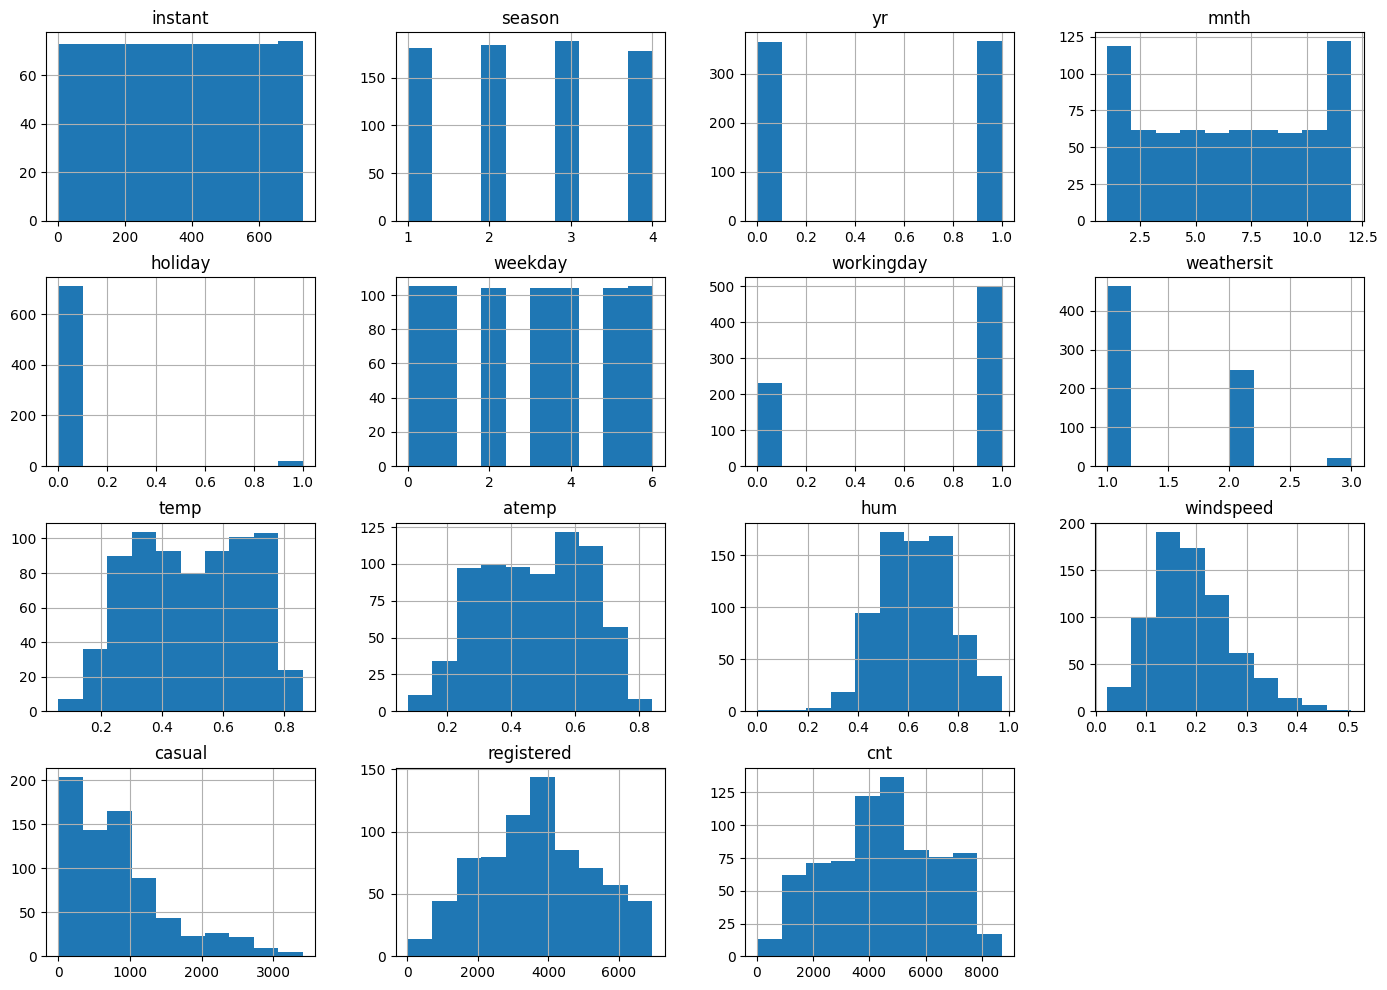

In [ ]:
data_hari.hist(figsize=(17, 12)) # Menampilkan histogram dari data berdasarkan masing-masing parameter
plt.show() # Menampilkan histogram

In [ ]:
# Menghitung korelasi antara cnt dengan semua kolom lainnya
cnt_corr = data_numerik.corr()['cnt'].sort_values(ascending=False)
print("korelasi antara cnt dan variabel lain:")
print(cnt_corr)

korelasi antara cnt dan variabel lain:
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


**Insight:**
- min cnt (total pengguna sepeda) sebanyak 22, dan maks cnt sebanyak 8714, dengan mean 4504.348837.
- Dapat dilihat bahwa faktor dari cuaca seperti temp dan atemp memiliki korelasi yang cukup kuat dengan cnt (total penggunaan sepeda), sedangkan faktor hum dan windspeed memiliki korelasi yang lemah dengan cnt.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

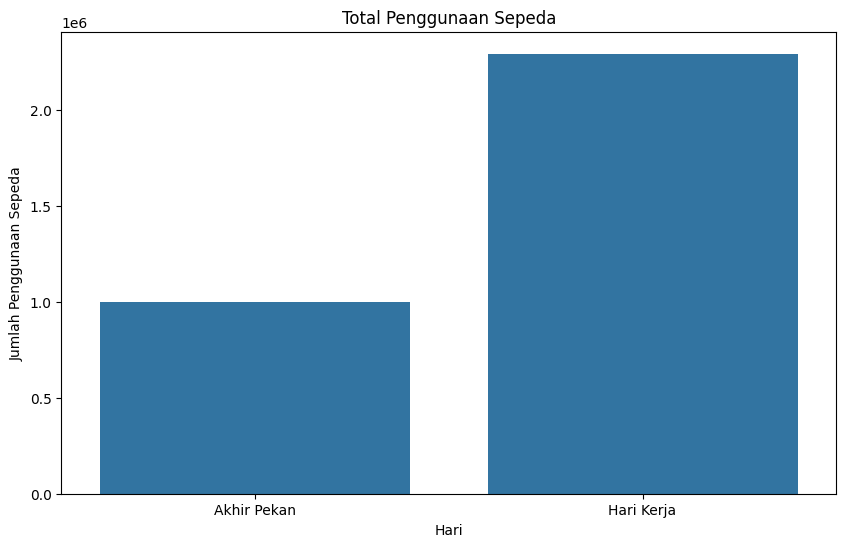

In [ ]:
# Menghitung total penggunaan sepeda berdasarkan workingday
cnt_workingday = data_hari.groupby('workingday')['cnt'].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=cnt_workingday)
plt.title('Total Penggunaan Sepeda')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.show()

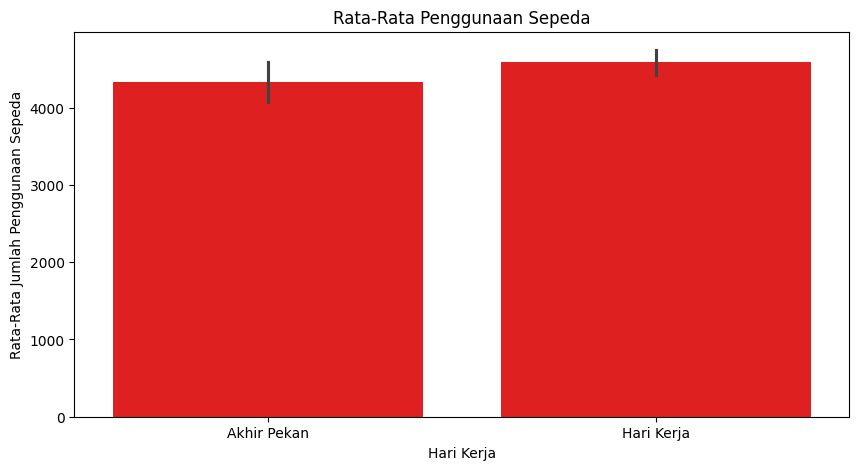

In [ ]:
# menghitung rata-rata penggunaan sepeda berdasarkan hari kerja
plt.figure(figsize=(10, 5))
sns.barplot(x='workingday', y='cnt', data=data_hari, color='red')
plt.title('Rata-Rata Penggunaan Sepeda')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-Rata Jumlah Penggunaan Sepeda')
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.show()


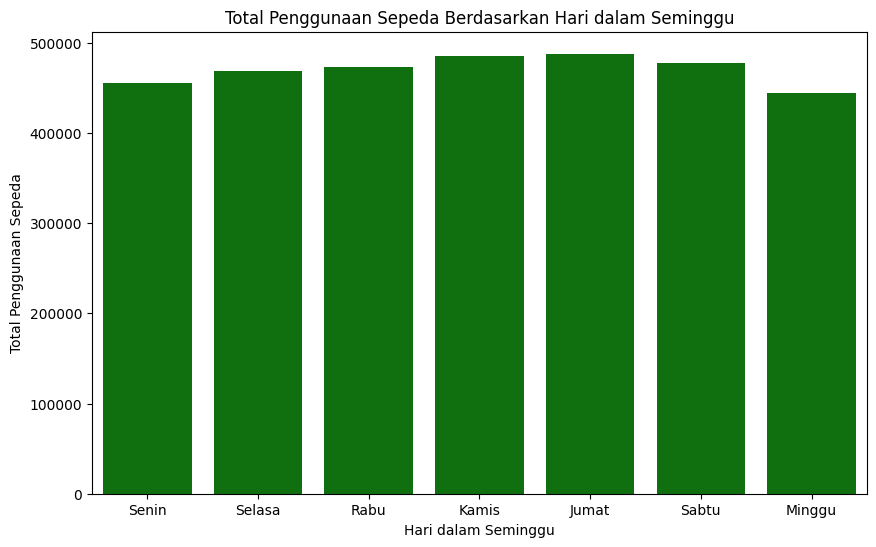

In [ ]:
# Mengubah kolom dteday menjadi tipe datetime
data_hari['dteday'] = pd.to_datetime(data_hari['dteday'])

# Menambahkan kolom hari dalam seminggu
data_hari['hari_dalam_seminggu'] = data_hari['dteday'].dt.day_name()
hari= {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}

data_hari['hari_dalam_seminggu'] = data_hari['hari_dalam_seminggu'].map(hari)

# Mengelompokkan dan menghitung total penggunaan sepeda per hari
cnt_harian = data_hari.groupby('hari_dalam_seminggu')['cnt'].sum().reindex(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']).reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='hari_dalam_seminggu', y='cnt', data=cnt_harian, color='green')
plt.title('Total Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penggunaan Sepeda')
plt.show()



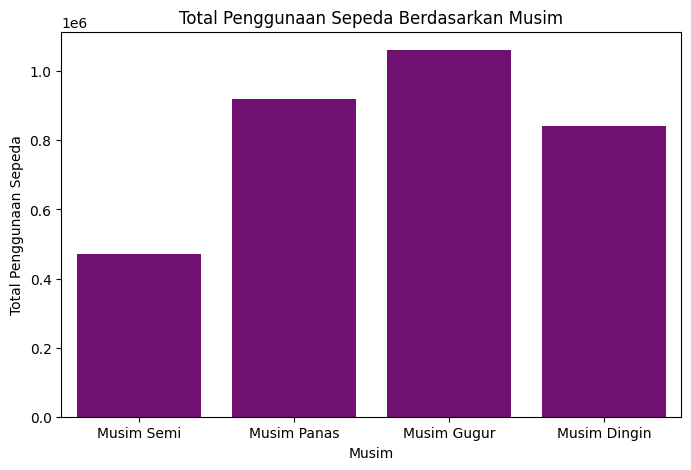

In [ ]:
# Menghitung total penggunaan sepeda berdasarkan musim
cnt_season = data_hari.groupby('season')['cnt'].sum().reset_index()

# Mapping angka musim menjadi nama musim
cnt_season['season'] = cnt_season['season'].map({
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
})

# Membuat bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=cnt_season, color='purple')
plt.title('Total Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penggunaan Sepeda')
plt.show()



### Pertanyaan 2:

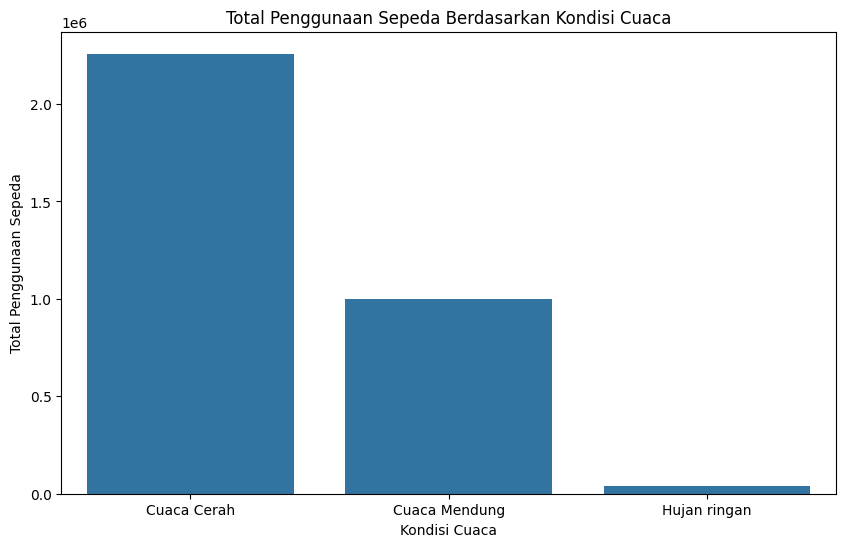

In [ ]:
# Menghitung total penggunaan sepeda berdasarkan kondisi cuaca
cnt_cuaca = data_hari.groupby('weathersit')['cnt'].sum().reindex([0, 1, 2, 3]).reset_index()

# Mapping kondisi cuaca menjadi nama dalam bahasa Indonesia
cuaca_mapping = {
    1: 'Cuaca Cerah',
    2: 'Cuaca Mendung',
    3: 'Hujan',
}

# Mengganti nilai numerik cuaca dengan nama cuaca
cnt_cuaca['weathersit'] = cnt_cuaca['weathersit'].map(cuaca_mapping)

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=cnt_cuaca)
plt.title('Total Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penggunaan Sepeda')
plt.show()



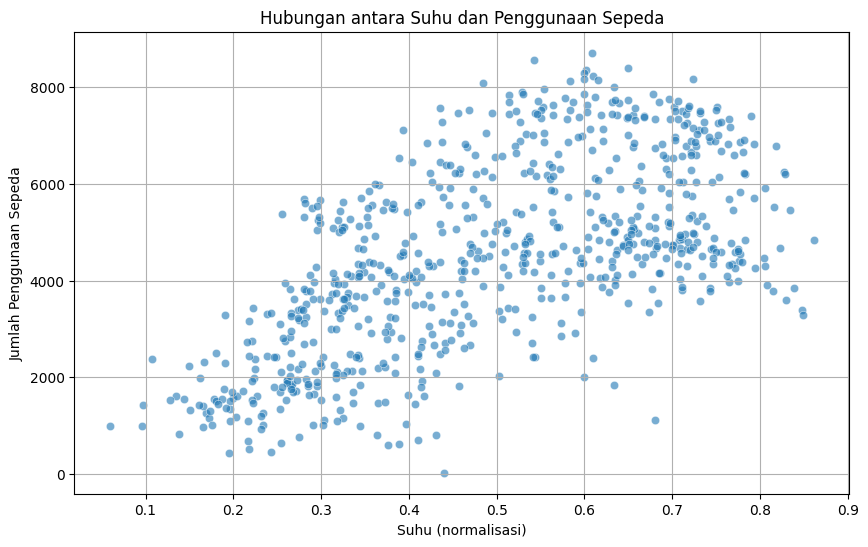

In [ ]:
#Scatterplot untuk hubungan antara suhu normalisasi dan penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data_hari, alpha=0.6)
plt.title('Hubungan antara Suhu dan Penggunaan Sepeda')
plt.xlabel('Suhu (normalisasi)')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid()
plt.show()


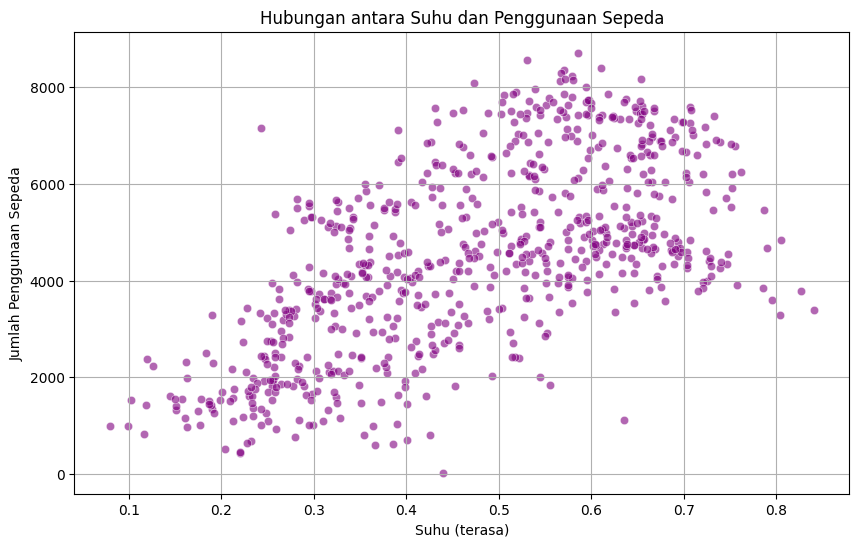

In [ ]:
#Scatterplot untuk hubungan antara suhu terasa dan penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=data_hari, alpha=0.6, color ='purple')
plt.title('Hubungan antara Suhu dan Penggunaan Sepeda')
plt.xlabel('Suhu (terasa)')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid()
plt.show()

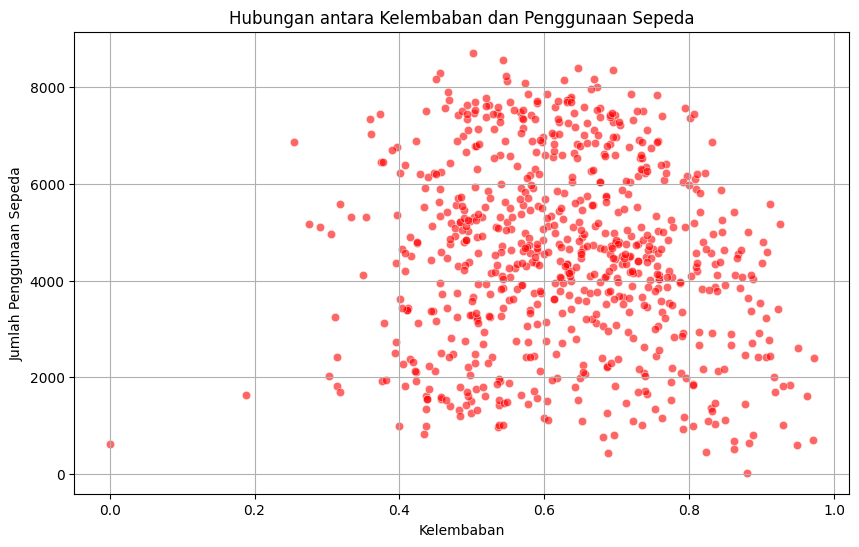

In [ ]:
#Scatterplot untuk hubungan antara Kelembaban dan penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=data_hari, alpha=0.6, color = 'red')
plt.title('Hubungan antara Kelembaban dan Penggunaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid()
plt.show()

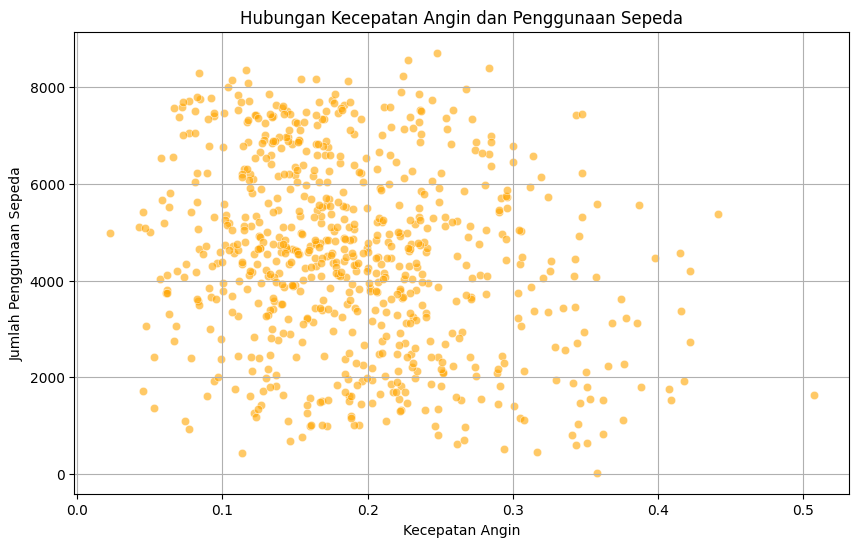

In [ ]:
#Scatterplot untuk hubungan antara kecepatan angin dan penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=data_hari, alpha=0.6, color = 'orange')
plt.title('Hubungan Kecepatan Angin dan Penggunaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.grid()
plt.show()

### Pertanyaan 3:

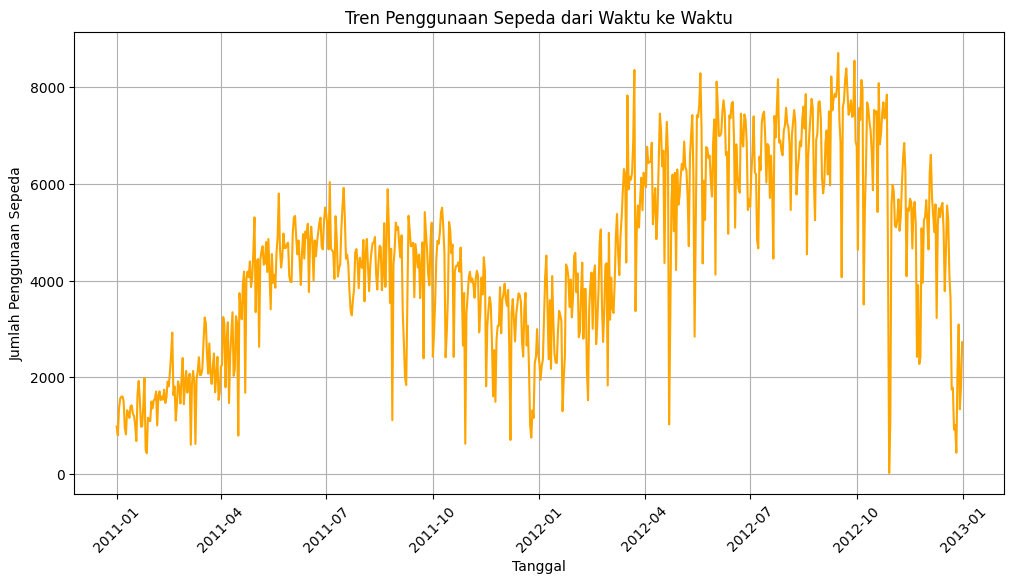

In [ ]:
# Mengelompokkan data berdasarkan tanggal untuk melihat tren penggunaan dari waktu ke waktu
data_hari['dteday'] = pd.to_datetime(data_hari['dteday'])
tren = data_hari.groupby('dteday')['cnt'].sum().reset_index()

# Membuat Line Plot
plt.figure(figsize=(12, 6))
plt.plot(tren['dteday'], tren['cnt'], color='orange')
plt.title('Tren Penggunaan Sepeda dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(rotation=45)
plt.grid()
plt.show()

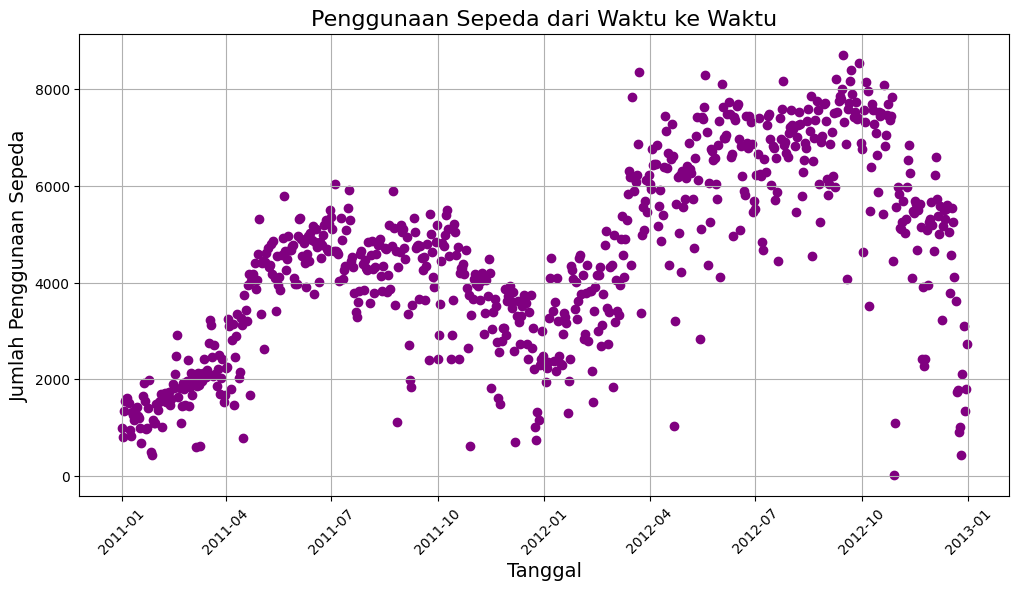

In [ ]:
# Mengubah kolom dteday menjadi tipe datetime
data_hari['dteday'] = pd.to_datetime(data_hari['dteday'])

# Mengelompokkan data berdasarkan tanggal untuk melihat tren penggunaan dari waktu ke waktu
tren = data_hari.groupby('dteday')['cnt'].sum().reset_index()

# Membuat scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(tren['dteday'], tren['cnt'], color='purple')
plt.title('Penggunaan Sepeda dari Waktu ke Waktu', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Penggunaan Sepeda', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()



**Insight:**
- Penggunaan sepeda pada hari kerja cenderung lebih banyak dibandingkan dengan akhir pekan.
- Penggunaan sepeda pada musim gugur cenderung lebih banyak dari musim lainnya.
- Penggunaan sepeda dipengaruhi oleh cuaca dan suhu pada hari tersebut, ketika cuaca cerah maka pengguna sepeda akan lebih banyak dibandingkan ketika mendung ataupun hujan, begitu pula dengan suhu ketika suhu normal (tidak terlalu panas ataupun dingin) pengguna sepeda akan cenderung lebih banyak.
- Tren penggunaan sepeda meningkat dari bulan Januari hingga Juli 2011, kemudian terjadi penurunan pada bulan Oktober 2011 hingga Januari 2012, namun meningkat cukup signifikan pada Januari hingga April 2012, dan cukup konstan pada April hingga Oktober 2012, lalu terjadi penurunan di awal tahun 2013.

## Analisis Lanjutan (Opsional)

ValueError: could not convert string to float: '2011-01-01'

<Figure size 1200x800 with 0 Axes>

## Conclusion

- Conclution pertanyaan 1 : Penggunaan sepeda pada hari libur tidak lebih banyak dari penggunaan pada hari kerja.
- Conclution pertanyaan 2 : Cuaca dan suhu memberikan pengaruh yang cukup signifikan pada permintaan penggunaan sepeda. Semakin cerah cuaca dan semakin normal suhu, permintaan pengguanaan sepeda semakin banyak. Kelembaban dan kecepatan angin tidak memberikan pengaruh yang signifikan pada permintaan penggunaan sepeda.
- Conclution pertanyaan 3: Tren permintaan penggunaan sepeda dari waktu ke waktu tidak selalu konstan, ada waktu dimana permintaan meningkat ataupun sebaliknya. Permintaan di akhir tahun cenderung menurun dan kembali meningkat ketika awal tahun.